# Ejercicio Gaussiana Multivariada
Sea $\mathbf{X} = [X_1,X_2,\ldots,X_n]$ un vector gaussiano con función de densidad
$$ f_\mathbf{X}(\mathbf{x}) = \frac{1}{(2\pi)^{n/2}|C_\mathbf{X}|^{1/2}}\exp\bigg\{-\frac{1}{2}(\mathbf{x}-\boldsymbol{\mu}_\mathbf{X})^TC_\mathbf{X}^{-1}(\mathbf{x}-\boldsymbol{\mu}_\mathbf{X})\bigg\} $$
donde
* $\boldsymbol{\mu}_\mathbf{X}\in\mathbb{R}^n$ es el vector de medias.
* $C_\mathbf{X}\in\mathbb{R}^{n\times n}$ es la matriz de covarianza. $C_\mathbf{X} = C_\mathbf{X}^T$ y $C_\mathbf{X}$ es semidefinida positiva.
* n es la dimensión del vector $\mathbf{X}$

## Caso n=2

Sea $\mathbf{Z} = [X,Y]^T$ vector gaussiano, con media

$$ \boldsymbol{\mu}_\mathbf{Z} = \left[ \begin{aligned} \mu_X \\ \mu_Y \end{aligned} \right] \qquad C_\mathbf{Z} = \left[ \begin{aligned} \sigma_X^2 \quad \sigma_{XY}\\ \sigma_{XY} \quad \sigma_Y^2 \end{aligned} \right],$$

donde $\mu_X$ y $\sigma_X^2$ ($\mu_Y$ y $\sigma_Y^2$) son la media y la varianza de $X$ ($Y$) y $\sigma_{XY}$ es la covarianza entre $X$ e $Y$



In [16]:
import numpy as np
import matplotlib.pyplot as plt

### Ejemplo 1:  

$$\boldsymbol{\mu}_\mathbf{Z} = \left[ \begin{aligned} 0 \\ 0 \end{aligned} \right], \qquad C_\mathbf{Z} = \left[ \begin{aligned} 1 \quad 0\\ 0 \quad 1 \end{aligned} \right]$$

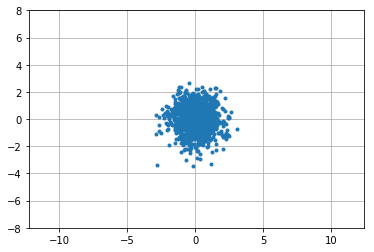

In [17]:
N=1000 # Cantidad de Realizaciones
mu=np.array([0,0]) # Vector de medias
sigma=np.eye(2) # Matriz de Covarianza 
x=np.random.multivariate_normal(mu,sigma,N)

plt.figure()
plt.plot(x[:,0],x[:,1],'.')
plt.axis('equal')
plt.grid(True)
plt.ylim([-8,8])
plt.show()

### Ejemplo 2: 

$$\boldsymbol{\mu}_\mathbf{Z} = \left[ \begin{aligned} 0 \\ 0 \end{aligned} \right], \qquad C_\mathbf{Z} = \left[ \begin{aligned} 1 \quad 0\\ 0 \quad 4 \end{aligned} \right]$$

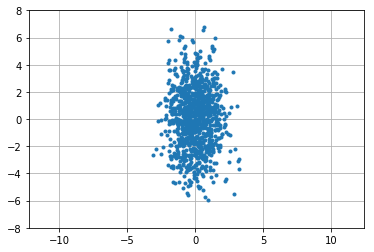

In [18]:
N=1000 # Cantidad de Realizaciones
mu=np.array([0,0]) # Vector de medias
sigma=np.array([[1, 0],[0, 5]]) # Matriz de Covarianza 
x=np.random.multivariate_normal(mu,sigma,N)

plt.figure()
plt.plot(x[:,0],x[:,1],'.')
plt.axis('equal')
plt.grid(True)
plt.ylim([-8,8])
plt.show()

Notar que los puntos estan centrados en (0,0). Ahora tomemos $\boldsymbol{\mu}_\mathbf{Z} = \left[ \begin{aligned} 1 \\ 2 \end{aligned} \right]$ para ambos casos

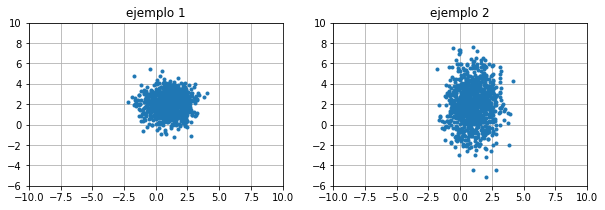

In [19]:
N=1000 # Cantidad de Realizaciones
mu=np.array([1,2]) # Vector de medias
sigma1 = np.eye(2)
sigma2=np.array([[1, 0],[0, 4]]) # Matriz de Covarianza 

x1=np.random.multivariate_normal(mu,sigma1,N)
x2=np.random.multivariate_normal(mu,sigma2,N)

plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(x1[:,0],x1[:,1],'.')
plt.grid(True)
plt.ylim([-6,10]); plt.xlim([-10,10])
plt.title('ejemplo 1')

plt.subplot(122)
plt.plot(x2[:,0],x2[:,1],'.')
plt.grid(True)
plt.ylim([-6,10]); plt.xlim([-10,10])
plt.title('ejemplo 2')

plt.show()

## Curvas de nivel

Una forma de estudiar una Gaussiana multivariada, en especial la bivariada is ver sus curvas de nivel. Para un función $f:\mathbb{R}^2\to\mathbb{R}$ la curva de nivel es el conjunto

$$ \big\{\mathbf{x}\in\mathbb{R}^2 : f(\mathbf{x}) = c\big\},$$

donde $c\in\mathbb{R}$.

Para el caso de la función de densidad gaussiana

$$ f_\mathbf{Z}(\mathbf{z}) = \frac{1}{(2\pi)|C_\mathbf{Z}|^{1/2}}\exp\bigg\{-\frac{1}{2}(\mathbf{z}-\boldsymbol{\mu}_\mathbf{Z})^TC_\mathbf{Z}^{-1}(\mathbf{z}-\boldsymbol{\mu}_\mathbf{z})\bigg\}=c.$$
Operando, llegamos a que

$$(\mathbf{z}-\boldsymbol{\mu}_\mathbf{Z})^TC_\mathbf{Z}^{-1}(\mathbf{z}-\boldsymbol{\mu}_\mathbf{z}) = c'.$$

### Curvas de Nivel Para el Ejemplo 1

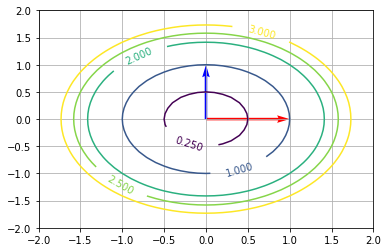

In [20]:
x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)
X, Y = np.meshgrid(x, y)

mu_x = 0; mu_y = 0 # medias
sigma_x = 1; sigma_y = 1;  rho = 0.0 # desvios y coeficiente de correlacion

Z = ((X-mu_x)/sigma_x)**2 + ((Y-mu_y)/sigma_y)**2 - 2*rho*(X-mu_x)*(Y-mu_y)/(sigma_x*sigma_y)

Cov = np.array([[ sigma_x**2 , rho*sigma_x*sigma_y], [rho*sigma_x*sigma_y,  sigma_y**2]])
Lambda, V = np.linalg.eig(Cov)

origin = [mu_x], [mu_y] # origen

fig = plt.figure()
contour = plt.contour(X, Y, Z, levels = [0.25, 1, 2.0, 2.5, 3])
plt.clabel(contour, inline = True, fontsize = 10)
plt.quiver(origin[0],origin[1], V[:,0], V[:,1], color=['r','b'], angles='xy', scale_units='xy', scale=1)
plt.xlim((-2,2)); plt.ylim((-2,2))
plt.grid(True)

### Curvas de Nivel Ejemplo 2

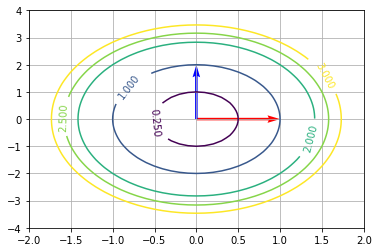

In [21]:
x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-4.0, 4.0, 0.1)
X, Y = np.meshgrid(x, y)

mu_x = 0; mu_y = 0 # medias
sigma_x = 1; sigma_y = 2;  rho = 0.0 # desvios y coeficiente de correlacion

Z = ((X-mu_x)/sigma_x)**2 + ((Y-mu_y)/sigma_y)**2 - 2*rho*(X-mu_x)*(Y-mu_y)/(sigma_x*sigma_y)

Cov = np.array([[ sigma_x**2 , rho*sigma_x*sigma_y], [rho*sigma_x*sigma_y,  sigma_y**2]])
Lambda, V = np.linalg.eig(Cov)

origin = [mu_x], [mu_y] # origen

fig = plt.figure()
contour = plt.contour(X, Y, Z, levels = [0.25, 1, 2.0, 2.5, 3])
plt.clabel(contour, inline = True, fontsize = 10)
plt.quiver(origin[0],origin[1], V[:,0], V[:,1]*np.sqrt(Lambda[1]), color=['r','b'], angles='xy', scale_units='xy', scale=1)
plt.xlim((-2,2)); plt.ylim((-4,4))
plt.grid(True)

Para estos dos ejemplos la matriz de covarianza es diagonal, por lo tanto las curvas de nivel se puede escribir como

$$ (\mathbf{z}-\boldsymbol{\mu}_\mathbf{Z})^TC_\mathbf{Z}^{-1}(\mathbf{z}-\boldsymbol{\mu}_\mathbf{z}) = \frac{(x-\mu_X)^2}{\sigma_X^2} + \frac{(y - \mu_Y)^2}{\sigma_Y^2}= c'$$

* Para el caso del ejemplo 1, las varianzas son iguales por lo que las curvas de nivel serán circulos centrados en $[\mu_X,\mu_Y]^T$ y de radio $c'$. Cuando $c'=1$, el radio  es proporcional al autovalor de la matriz de covarianza.

* Para el caso del ejemplo 2, las varianzas son distintas por lo que las curvas de nivel serán elipses centrados en $[\mu_X,\mu_Y]^T$ y la longitud de los ejes mayores y menores será proporcional a los autovalores de la matriz de covarianza.

* Otra observación que podemos hacer, es que los autovectores de la matriz de covarianza son perpendiculares (ortogonales entre sí) y cada uno es paralelo (en la misma dirección que) al eje mayor o menor de la ellipse.



### Ejemplo: Obtener variables decorrelacionadas 

Sea el vector aleatorio gaussiano $\mathbf{X} = [X_1,X_2]$ con media y matriz de covarianza 
$$ \boldsymbol{\mu}_\mathbf{X} = \left[ \begin{aligned} 2 \\ 4 \end{aligned} \right] \qquad C_\mathbf{X} = \left[ \begin{aligned} 9 \quad 3\\ 3 \quad 4 \end{aligned} \right],$$

Utilizando cambio de variables halle una vector aleatoria gaussiano $\mathbf{Y} = [Y_1,Y_2]^T$ con componentes decorrelacionadas y media nula.

Text(0.5,1,u'Realizaciones de X')

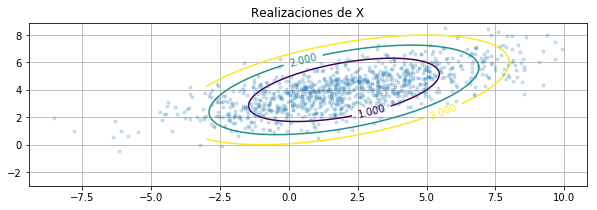

In [22]:
# Simulamos realizaciones del vector aleatorio X
N = 1000
mu_x1 = 2; mu_x2 = 4; # medias X1 y X2
sigma_x1 = 3; sigma_x2 = 2; # Desvios X1 y X2
rho = 0.5 # coeficiente de correlacion entre X1 y X2

mu_X = np.array([mu_x1,mu_x2])
Cov_X = np.array([[sigma_x1**2,rho*sigma_x1*sigma_x2],[rho*sigma_x1*sigma_x2, sigma_x2]])

# Realizaciones del vector X
X = np.random.multivariate_normal(mu_X,Cov_X,N)

# Curvas de nivel del vector X
x1 = np.arange(-3.0, 9.0, 0.1); x2 = np.arange(-3.0, 9.0, 0.1)
X1, X2 = np.meshgrid(x1, x2)
cX = ((X1-mu_x1)/sigma_x1)**2 + ((X2-mu_x2)/sigma_x2)**2 - 2*rho*(X1-mu_x1)*(X2-mu_x2)/(sigma_x1*sigma_x2)

plt.figure(figsize=(10,3))
plt.plot(X[:,0],X[:,1], '.', alpha = 0.2)
contour = plt.contour(X1, X2, cX, levels = [1, 2, 3])
plt.clabel(contour, inline = True, fontsize = 10)
plt.grid(True)
plt.title('Realizaciones de X')

Para obtener el vector aleatorio $\mathbf{Y}$ proponemos el siguiente cambio de variables
$$ \mathbf{Y} = V^T(\mathbf{X} - \boldsymbol{\mu}_\mathbf{X}) $$,
donde $V$ es la matrix de autovectores de $C_\mathbf{X}$.

In [23]:
Lambda, V = np.linalg.eig(Cov_X)
idx = np.argsort(-Lambda)
Lambda = Lambda[idx]; V = V[:,idx]

print("Matriz de Autovectores")
print('V = ' + str(V))
print('Autovalores: ' + str(Lambda))


Matriz de Autovectores
V = [[ 0.93788501 -0.34694625]
 [ 0.34694625  0.93788501]]
Autovalores: [10.10977223  0.89022777]


A partir de la realizaciones de $\mathbf{X}$ hallamos las de $\mathbf{Y}$ mediante el cambio de variables propuesto.

$$ \boldsymbol{\mu}_\mathbf{Y} = \mathbb{E}[\mathbf{Y}] = \mathbb{E}[V^T(\mathbf{X}-\boldsymbol{\mu}_\mathbf{X})] = V^T(\mathbb{E}[\mathbf{X}] - \boldsymbol{\mu}_\mathbf{X}) = \mathbf{0}$$

$$ C_\mathbf{Y} = \mathbb{E}[(\mathbf{Y}-\boldsymbol{\mu}_\mathbf{Y})(\mathbf{Y}-\boldsymbol{\mu}_\mathbf{Y})^T] = \mathbb{E}[V^T(\mathbf{X}-\boldsymbol{\mu}_\mathbf{X})(\mathbf{X}-\boldsymbol{\mu}_\mathbf{X})^TV] = V^T\mathbb{E}[(\mathbf{X}-\boldsymbol{\mu}_\mathbf{X})(\mathbf{X}-\boldsymbol{\mu}_\mathbf{X})^T]V = V^TC_\mathbf{X}V.$$

E[Y] = [ 0.03402809 -0.01140864]
C_Y = [[1.01097722e+01 3.33066907e-16]
 [0.00000000e+00 8.90227771e-01]]


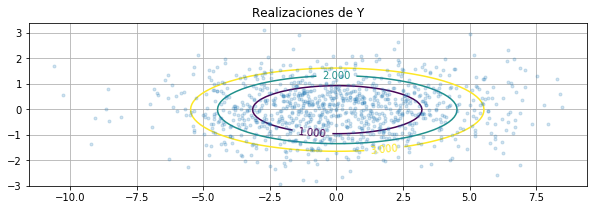

In [26]:
# Cambio de variables propuesto
# Y = V^T(X-mu_X)

# Realizaciones del vector Y
Y = np.dot(V.T,(X-mu_X).T).T

# Vector de medias y Matriz de Covarianza
mu_Y = np.mean(Y,axis = 0) # Medias y1 e y2
Cov_Y = np.dot(V.T,np.dot(Cov_X,V)) # Matriz de Covarianza de Y

mu_y1 = mu_Y[0]; mu_y2 = mu_Y[1] 
sigma_y1 = np.sqrt(Cov_Y[0,0]); sigma_y2 = np.sqrt(Cov_Y[1,1]);
rho_Y = Cov_Y[0,1]/sigma_y1/sigma_y2



# Curvas de nivel del vector X
y1 = np.arange(-6.0, 6.0, 0.1); y2 = np.arange(-3.0, 3.0, 0.1)
Y1, Y2 = np.meshgrid(y1, y2)
cY = ((Y1-mu_y1)/sigma_y1)**2 + ((Y2-mu_y2)/sigma_y2)**2 - 2*rho_Y*(Y1-mu_y1)*(Y2-mu_y2)/(sigma_y1*sigma_y2)

plt.figure(figsize=(10,3))
plt.plot(Y[:,0],Y[:,1],'.', alpha = 0.2)
contour = plt.contour(Y1, Y2, cY, levels = [1, 2, 3])
plt.clabel(contour, inline = True, fontsize = 10)
plt.grid(True)
plt.title('Realizaciones de Y')

print('E[Y] = ' + str(mu_Y))
print('C_Y = ' + str(Cov_Y))